## How Fancy Indexing works?

Fancy indexing: just like the simple indexing, but pass arrays of indices in place of single scalars

In [1]:
import numpy as np

In [2]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

Suppose we want to access three different elements. We could do it like this:

In [3]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternatively, we can pass a single list or array of indices to obtain the same result

In [4]:
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

### When using fancy indexing, the shape of the result reflects the shape of the *index arrays* rather than the shape of the *array being indexed*

In [6]:
ind = np.array([[3, 7],
                [4, 5]])

x[ind]

array([[71, 86],
       [60, 20]])

In [9]:
print("Shape of x:", x.shape)
print("Shape of index array:", ind.shape)
print("Shape of result:", x[ind].shape)

Shape of x: (10,)
Shape of index array: (2, 2)
Shape of result: (2, 2)


### Fancy indexing also works in **multiple dimensions**.

In [23]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [25]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

X[row, col] # [X[0, 2], X[1, 1], X[2, 3]]

array([ 2,  5, 11])

### Fancy indexing also follows all the broadcasting rules. 

In [29]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [28]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## Combined Indexing

### Combine fancy indexing with other indexing schemes

In [30]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### Combine fancy and simple indices:

In [31]:
X[2, [2, 0, 1]] # [X[2,2], X[2,0], X[2,1]]

array([10,  8,  9])

### Combine fancy indexing with slicing:

In [32]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

### Combine fancy indexing with masking:

In [34]:
mask = np.array([1, 0, 1, 0], dtype=bool)
mask

array([ True, False,  True, False])

In [35]:
row

array([0, 1, 2])

In [36]:
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

Common use of fancy indexing: Selection of subsets of rows from a matrix

In [39]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]

X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

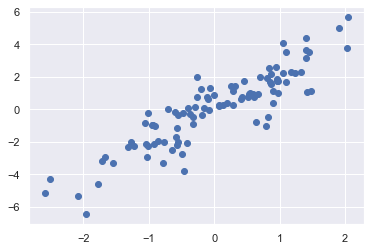

In [78]:
plt.scatter(X[:, 0], X[:, 1])

Select 20 random points:

1. Choose 20 random indices with no repeats

2. Use these indices to select a portion of the original array

In [70]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([31, 77,  4, 53, 52, 19, 26, 44,  2, 51, 68, 69, 94, 74, 55,  1, 91,
        7, 78, 98])

In [71]:
np.random.choice(np.arange(100), 20, replace=False)

array([85, 59, 25, 70, 71, 44,  9, 87, 86, 12, 94, 74, 22, 41, 89, 10, 62,
       36, 68,  1])

In [72]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

 Over-plot large circles at the locations of the selected points:

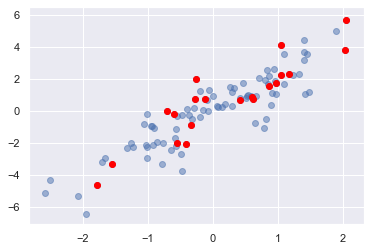

In [83]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(selection[:, 0], selection[:, 1], facecolor="red")

This sort of strategy is often used to 

- quickly partition datasets, as is often needed in train/test splitting for validation of statistical models 

- in sampling approaches to answering statistical questions

## Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array. 

In [84]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
i = np.array([2, 1, 8, 4])

In [86]:
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

### Notice: repeated indices with these operations can cause some potentially unexpected results!

In [87]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [88]:
x[[0, 0]] = [4, 6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

 The result of this operation is to first assign `x[0] = 4`, followed by `x[0] = 6`. The result, of course, is that `x[0]` contains the value 6.

In [90]:
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [89]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

We expect that `x[3]` would contain the value 2, and `x[4]` would contain the value 3, as this is how many times each index is repeated. But above is not the result we expect!

If we want the expected behavior where the operation is repeated, we should use `at()` method of ufuncs

In [91]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [93]:
np.add.at(x, i, 1)
x

array([0., 0., 2., 4., 6., 0., 0., 0., 0., 0.])

The `at()` method does an in-place application of the given operator at the specified indices (here, `i`) with the specified value (here, 1).

In [94]:
x1 = [
    np.array([[0, 1], 
              [-1, 1]]),
    np.array([[1, 2],
              [-1, 1]])
]

In [95]:
x1

[array([[ 0,  1],
        [-1,  1]]),
 array([[ 1,  2],
        [-1,  1]])]

In [96]:
x1[0]

array([[ 0,  1],
       [-1,  1]])